# Effective use of visual channels

::::{grid}

:::{grid-item-card}
**Lecture learning goals**
^^^

1. Choose effective visual channels for information display.
2. Distinguish between when to use an area and when to use a line to represent a trend.
3. Visualize frequencies with bar charts and histograms.
4. Facet into subplots to explore more variables simultaneously.
5. Customize axes labels and scales.
:::

:::{grid-item-card}
**Required readings**
^^^

Before class:

- The lecture notes up until the section "Global development data".
- [Section 1.4 - 1.8 in the book Data Visualization:
  A practical introduction by Kieran Healy](https://socviz.co/lookatdata.html#visual-tasks-and-decoding-graphs).

After class:

- The remaining lecture notes.
- [Section 6 of Fundamentals of Data visualization](https://clauswilke.com/dataviz/visualizing-amounts.html). You can read it at a high level to understand the main principles, rather than memorizing details.
:::
::::

**Lecture slides**

<html>
  <body>
    <iframe src="slides-lec2.pdf#zoom=80&&navpanes=0&statusbar=0&messages=0&pagemode=none" width="100%" height="475px" style="position: relative;z-index: 9999999;">
    </iframe>
  </body>
</html>

## Comparing sizes is easier for some geometrical objects than for others

So far we have seen how to use points and lines to represent data visually.
In this slide deck, we will see how we can also use areas and bars for this purpose.
Before we dive into the code, let's discuss how different visual channels,
such as position, area, etc, can impact how easy it is for us
to accurately interpret the plotted data.

As in many cases,
an efficient way to learn this topic is through personal experience,
rather than just being told the answer.
So lets experience which visual encodings are the most effective
by following along in a short exercise.
Note that it has been shown that we learn better
when actively trying to think of the answer to questions like these
instead of viewing the solution right away.

::::{admonition} Question
:class: tip

How many times bigger is the big object is compared to the small one in these images?

![](img/circle-comparison.png)

![](img/bar-comparison.png)

:::{dropdown} Click to reveal the solution
:animate: fade-in

In both cases, the bigger shape is seven times bigger.

![](https://viz-learn.mds.ubc.ca/module2/7x.png)

:::
::::

Even if you estimated both of these correctly,
most people find it is much easier to compare the length or position of the bars
rather than the area of the circles.
For the circles,
you might even have hesitated at exactly what to compare
when we said "how many time *larger*",
were you supposed to compare the area or the diameter?
This aspect is less ambiguous for bars as long as their widths are kept the same.
This is important to keep in mind,
especially when communicating to others via visualization,
but also when creating plots for yourself!

These two examples are originally from [Jeffrey Heer's PyData talk](https://www.youtube.com/watch?v=hsfWtPH2kDg),
who is a visualization researcher at the University of Washington
and whose research group created the D3 and VegaLite packages
which Altair is based on.

## Visual channel efficiency

Even if you got both these correct yourself,
the fact that many people prefer one over the other
means that in order for you to create effective visualizations
you need to know which visual channels are the easiest for humans to decode.

Luckily,
there has been plenty of research in this area,
which is summarized in the schematic below,
from the most to least effective visual channel.

![](https://viz-learn.mds.ubc.ca/module2/visual-channels-rank.png)

<!-- ![](img/visual-channels.png) -->

Position has been shown to cleary be the most effective visual channel
and therefore we should represent our most important comparison as different positions.
Using position often means that we can't use other things such as length
or angle (like the angle in a pie chart),
but we can add size or colour to represent other relationships.
Even if it is hard to tell exact information from these
(is this precisely colour/dot 2x darker/bigger than another?)
they are useful to give an idea of trends in the data.

### Unnecessary 3D makes plot interpretation harder

The biggest issue with using 3D is when it is used unnecessarily (like a 3D bar or pie chart),
as the only way to compare position (like a 3D scatter plot),
and when they are represented on a 2D medium like a paper where they can’t be rotated.

::::{admonition} Question
:class: tip

Which values do you think are represented by the bars A, B, C, and D
in the 3D bar chart below?

![](https://viz-learn.mds.ubc.ca/module2/bad-3d-barchart.png)

:::{dropdown} Click to reveal the solution
:animate: fade-in

While it looks like the values of the bars are around A=0.7, B=1.7, C=2.7 and D=3.7,
this is only because of the angle of the camera in the plot.
The actual values here of A, B, C, and D are 1, 2, 3, and 4, respectively.
This plot would have been much easier to read without the unnecessary 3D effect.

:::
::::

### Meaningful 3D can facilitate plot interpretation

Sometimes 3D can be useful,
like for a topographical map or a protein folding visualization.
Below you can see the [interesting work done with the Rayshader library](https://www.tylermw.com/3d-ggplots-with-rayshader/)
that maps in 3D in an intuitive way
incorporating reasonable camera rotation around the objects.
The example to the right visualizes the bend in space-time via 3D position (depth),
eliminating the need for an additional 2D plot as in the example to the left.

![](https://media.github.ubc.ca/user/1751/files/da4e1b00-0fd3-11eb-940d-0b06a28a0186)

But be cautious,
we will see in the next slides that even in systems such as blood vessels,
which are naturally organized in three dimensions,
it is still mentally more complex to interpret a 3D visualization accurately.
[Researcher Claus Wilke's has authored a good chapter](https://clauswilke.com/dataviz/no-3d.html) on this topic
if you are interested to learn more.

## Properly designed visualizations help saving lives 

How much these best practices actually matters
might be a bit abstract until you gain personal experience from it,
therefore, I want to include a concrete example
of how changing visualization methods improved an important clinical outcome.

Heart disease is the most common cause of death,
yearly killing almost 9 million people,
or as many as diabetes, dementia, neonatal conditions respiratory infections
all together.
By detecting regions of low shear stress (indicating low blood flow) in the arteries around the heart,
doctors can identify patients that are on their way to develop heart disease
and take action early to improve the patient's survival chances.

To evaluate the shear stress in the arteries,
the regular practice is to use a digital 3D representation of the artery
coloured according to the amount of shear stress
which is what you can see in the picture below.
The colormap changes from blue for the areas of interest (low stress)
to cyan, green, yellow, and red for higher stress.

A few years ago,
a research group set out to test how effective this type of visualization was
compared to a couple of alternatives.
When using the visualization you see below,
about 40% of the areas of low shear stress
were correctly identified by doctors.

![](https://viz-learn.mds.ubc.ca/module2/blood-vessels-40.png)

### Changing the colour scale almost doubled the accuracy

The first thing this research group tested
was the effect of testing the colour scale to one that is easier to interpret
and makes the important areas of low shear stress stand out more,
since they are highlighted in a bright red colour,
and the rest are in black and white.
By this seemingly small modification,
they identified that the percentage of correct analysis almost doubled,
from 40% to 70%.

We will talk more about choosing the correct colour scales in the later modules of this course.

![](https://viz-learn.mds.ubc.ca/module2/blood-vessels-70.png)

### Changing from 3D to 2D improved the further accuracy

The next modification the researcher tested
was to change from a 3D representation of the blood vessels to a 2D representation.
Although a 3D representation is more anatomically correct here,
it is also more cognitively demanding for us to process,
and some areas can cover others
so it is harder to get a quick overview of the vessels.
In the 2D visualization,
the blood vessels and their branching points
are shown in a schematic that is less cognitively demanding to interpret.
This representation was also shown to be more effective,
as 90% of the low shear stress areas were now correctly identified.

Overall,
these two tweaks more than doubled the outcome accuracy,
from 40% to 90%.
A huge increase from modification
that might have seemed to be a mere matter of taste unless you knew visualization theory!
So, if anyone tells you that visualization of data is not as important as other components,
you can tell them about this study
and ask them what kind of visualization
they want their doctor to look at
when analyzing their arteries.

![](https://viz-learn.mds.ubc.ca/module2/blood-vessels-90.png)

Like with many things,
there are situation where you can override these guidelines 
if you are sure about what you are doing
and trying create a specific effect in your communication.
But most times, 
it is best to adhere to the principles discussed above
and we will dive deeper into some of them later in the course.

## Plotting large datasets in Altair

So far we have learned about position, size, color, and shape (for categoricals)
with the line and point plots.
Let's see how area and barplots
use area, length, and position to compare objects.

### Global Development Data

We will be visualizing global health and population data for a number of countries.
This is the same data we're working with in lab 1.
We will be looking at many different data sets later,
but we're sticking to a familiar one for now
so that we can focus on laying a solid understanding of the visualization principles
with data we already know.
This dataset is made available via an URL
and we can download and read it into pandas
with `read_csv`.

In [1]:
import altair as alt
import pandas as pd


url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/world-data-gapminder.csv'
gm = pd.read_csv(url)
gm

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
0,Afghanistan,1800,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
1,Afghanistan,1801,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
2,Afghanistan,1802,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
3,Afghanistan,1803,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
4,Afghanistan,1804,3280000,Asia,Southern Asia,Low,28.2,603,7.00,469.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38977,Zimbabwe,2014,15400000,Africa,Sub-Saharan Africa,Low,57.0,1910,3.90,64.3,39.8,0.78,10.9,10.0
38978,Zimbabwe,2015,15800000,Africa,Sub-Saharan Africa,Low,58.3,1890,3.84,59.9,40.8,NaN,11.1,10.2
38979,Zimbabwe,2016,16200000,Africa,Sub-Saharan Africa,Low,59.3,1860,3.76,56.4,41.7,NaN,NaN,NaN
38980,Zimbabwe,2017,16500000,Africa,Sub-Saharan Africa,Low,59.8,1910,3.68,56.8,42.7,NaN,NaN,NaN


When reading in a new dataset,
it is always a good idea to have a look at a few rows
like we did in the previous slide
to get an idea of how the data looks.

Another helpful practice is to use the `.info()` method
to get an overview of the column types
and see if there are any `NaNs` (missing values).

If there are many missing values in a column,
we would want to look into why that is.
Later in the course, we will learn about how to visualize
missing values to understand if there are patterns
in which values are missing,
which could affect our data analysis.

In [2]:
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38982 entries, 0 to 38981
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                38982 non-null  object 
 1   year                   38982 non-null  int64  
 2   population             38982 non-null  int64  
 3   region                 38982 non-null  object 
 4   sub_region             38982 non-null  object 
 5   income_group           38982 non-null  object 
 6   life_expectancy        38982 non-null  float64
 7   income                 38982 non-null  int64  
 8   children_per_woman     38982 non-null  float64
 9   child_mortality        38980 non-null  float64
 10  pop_density            12282 non-null  float64
 11  co2_per_capita         16285 non-null  float64
 12  years_in_school_men    8188 non-null   float64
 13  years_in_school_women  8188 non-null   float64
dtypes: float64(7), int64(3), object(4)
memory usage: 4.2+ 

Now that we have seen what the data table looks like,
and which data type the values in each column are,
let's think about what we would want to visualize and why.

Since the data reaches all the way back to the 1800s,
it would be really interesting to plot
how the world population has been growing up until today.
We could use a line plot for this
as we learned in the first module.

::::{admonition} Question
:class: tip

Draw out a sketch of the visualization on paper yourself
so that it is clear what you expect the plot
before continuing.

:::{dropdown} Click to reveal the solution
:animate: fade-in

If we drew this visualization out on paper,
we would maybe expect something a like this
a single line that increases from the 1800s up until today
as the population increased.
It's a good idea to include axis labels too! 

![](https://viz-learn.mds.ubc.ca/module2/drawing.png)

:::
::::

Ok now we are ready to plot our data!
Or are we?

As you can see from when we glances at the dataframe argument above,
we have a quite large data set with almost 40k observations 
for most variables.
If we try to plot this dataset with Altair,
it will actually throw an error,
let's see what this looks like:

In [3]:
alt.Chart(gm).mark_line().encode(
    x='year',
    y='sum(population)'
)

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000).

Try enabling the VegaFusion data transformer which raises this limit by pre-evaluating data
transformations in Python.
    >> import altair as alt
    >> alt.data_transformers.enable("vegafusion")

Or, see https://altair-viz.github.io/user_guide/large_datasets.html for additional information
on how to plot large datasets.

alt.Chart(...)

By default Altair only allows us to plot datasets with 5,000 rows.
The reason for this is that Altair does not simply display plots as images,
but as interactive HTML elements
that contain the entire dataframe in text format
as well as a declaration for which variable are plotted in which visual channel.
This is great from a reproducibility perspective,
but it means that the charts become very large when there is a lot of data
and your Jupyter Notebook will quickly become 100s of MB.

We will talk more about the details of how Altair charts are represented later in this course.
For now it is enough to know which are the necessary steps to plot large datasets,
even if you don't yet understand exactly what is happening under the hood.

The first line we will run is the following:

```python
alt.data_transformers.enable('vegafusion')
```

All charts created after activating the VegaFusion data transformer will work with datasets containing up to 100,000 rows.
VegaFusion’s row limit is applied after all supported data transformations have been applied.
So you are unlikely to reach it with a chart such as a histogram,
but you may hit it in the case of a large scatter chart or a chart that uses interactivity.
If you need to work with even larger datasets,
you can disable the maximum row limit or switch to using the VegaFusion widget renderer;
[both are described in the Altair documentation](https://altair-viz.github.io/user_guide/large_datasets.html)).

In [4]:
# Simplify working with large datasets in Altair
# We will be using this by default from now on
alt.data_transformers.enable('vegafusion')

DataTransformerRegistry.enable('vegafusion')

## Area charts

### Altair

Now we are ready to create our plot!
Since we want to see how the **world** population has changed,
we need to sum up the population of all countries in each year
using the `sum` aggregation function in Altair.
Let's do this using the line chart we learned about in last lecture:

In [5]:
alt.Chart(gm).mark_line().encode(
    x='year',
    y='sum(population)'
)

alt.Chart(...)

Interestingly,
it seems like the world population have been growing in two distinct phases:
slowly before 1950,
and more rapidly afterwards.
We will talk more about that later on.

We can see here that Altair automatically changes the axis label for us to reflect the operation
that we have performed on the data,
here taking the "sum" of the countries.

However, something seems to be going on with the x-axis
as the years are showing up in integer format as `1,990, 2,000, etc`.
While adding the comma as a thousand separator like this generally improves readability,
it is not what we want for years,
which we expect to show up as `1990, 2000, etc`.
We can indicate that we want Altair to use a temporal data type here
by adding the `:T` suffix to the column name.
We will learn more about different data types later,
for now this is all we need.

In [6]:
alt.Chart(gm).mark_line().encode(
    x='year:T',
    y='sum(population)'
)

alt.Chart(...)

We could also have created this same visualization using an area chart:

In [7]:
alt.Chart(gm).mark_area().encode(
    x='year:T',
    y='sum(population)'
)

alt.Chart(...)

For showing a single trend over time,
the choice between a line and area chart comes down to aesthetics.
They are both effective choices for this purpose.
However,
when visualizing the trends over time for multiple groups,
lines and areas have different advantages.
Let's see how it looks for the area chart first.

In [8]:
alt.Chart(gm).mark_area().encode(
    x='year:T',
    y='sum(population)',
    color='region'
)

alt.Chart(...)

The y-axis range of this chart
is the same as the one on the previous plot,
so it is easy to see how the total world population has changed over time.
From the stacked colored regions,
we also get a rough idea of how each region has grown,
but it is hard to compare exactly,
especially for regions that are not stacked next to each other.
For example,
we can't really tell if Europe or Africa, has the largest population in the most recent year.

Altair stacks by areas by default,
which is usually what we want when creating an area chart with groups.
But if someone saw our chart without knowing this,
they might think that the areas are layered behind each other,
so that we only see the top of the blue region 
peak out behind the orange region.
Using a line chart
is the preferred choice when we want to view the exact values of each group
and don't care as much about the total of the groups added together.

In [9]:
alt.Chart(gm).mark_line().encode(
    x='year:T',
    y='sum(population)',
    color='region'
)

alt.Chart(...)

In the chart above,
it is immediately clear that Africa has had a bigger population than Europe
and since shortly after the year 2000.
The drawback is that
it's quite cognitively demanding
to try to reconstruct the total world population
by adding all the lines up together,
especially over time!

When the sum of the different groups in the chart is not meaningful,
a line chart is also the better choice.
For example,
let's answer a slightly different question with a visualization:
"What is the average number of children per woman in a country for each continent?"
Let's first look at this with an area plot like above:

:::{margin} Factual tidbit

Population experts predict that the world population
will stop increasing and stabilize around 11 billion people.
This is mainly due to improved living conditions in low income countries,
which reduces child mortality
and allows families to have fewer children.
You will learn more about this in lab 1.

:::

In [10]:
alt.Chart(gm).mark_area().encode(
    x='year:T',
    y='mean(children_per_woman)',
    color='region'
)

alt.Chart(...)

Here,
summing/stacking the average areas does give a meaningful number 
(there wasn't 30 children per woman in the 1800s...).
We can try to unstack the areas to remedy this issue,
and show them behind each other on the same baseline instead of on top of each other.

#### `alt.X` and `alt.Y`

In order to create an area chart
where the colored regions are layered behind each other 
rather than stacked on top,
we need to leverage the helper functions `alt.Y` and `alt.X`.
These helpers have the role of customizing things like order, groups, and scale for the axis.
When using just `y='column'`,
we're still calling `alt.Y()` under the hood,
we just save ourselves some typing.

Let's first use `alt.Y` on its own
without any additional argument
to recreate the same area plot as above
just to demonstrate how it works.

In [11]:
alt.Chart(gm).mark_area().encode(
    x='year:T',
    y=alt.Y('mean(children_per_woman)'),
    color='region'
)

alt.Chart(...)

Now we can pass options inside `alt.Y`,
e.g. to turn off stacking
we can use the `.stack(False)` method of `alt.Y`
(we also set the opacity of the areas
to allow us to see area behind each other).

In [12]:
alt.Chart(gm).mark_area(opacity=0.4).encode(
    x='year:T',
    y=alt.Y('mean(children_per_woman)').stack(False),
    color='region'
)

alt.Chart(...)

As you can see,
this is still not a very effective plot
for our data.
It is difficult to discern where
the areas overlap and we mostly see a brown smear
of them all on top of each other;
a line chart would not have this issue.
We will see when layered areas can be effective later in the course,
but generally it is when there are fewer groups,
or non-overlapping areas such as density plots.

In the chart above,
it also looks like the trends over time
for different continents
are pretty similar.
If we create the line chart
of the same data,
we can see that Europe follows a much different development
than to the other regions.

In [13]:
alt.Chart(gm).mark_line().encode(
    x='year:T',
    y='mean(children_per_woman)',
    color='region'
)

alt.Chart(...)

Note that you could use `stack=True` to create a stacked line chart,
but you should **never** do this
as it it very confusing and unexpected.
If you want to stack groups, use an area chart.

### ggplot

In [14]:
# Load the extension so that we can use the %%R cell magic
%load_ext rpy2.ipython

In [15]:
%%R
library(tidyverse)

theme_set(theme_gray(base_size = 18))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In the tidyverse,
we can use `glimpse` to view info of our dataframe.

In [16]:
%%R
url = 'https://raw.githubusercontent.com/joelostblom/teaching-datasets/main/world-data-gapminder.csv'
gm = read_csv(url)
glimpse(gm)

Rows: 38982 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): country, region, sub_region, income_group
dbl (10): year, population, life_expectancy, income, children_per_woman, chi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 38,982
Columns: 14
$ country               <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Af…
$ year                  <dbl> 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, …
$ population            <dbl> 3280000, 3280000, 3280000, 3280000, 3280000, 328…
$ region                <chr> "Asia", "Asia", "Asia", "Asia", "Asia", "Asia", …
$ sub_region            <chr> "Southern Asia", "Southern Asia", "Southern Asia…
$ income_group          <chr> "Low", "Low", "Low", "Low", "Low", "Low", "Low",…
$ life_expectancy       <dbl> 28.2, 28.2, 28.2, 28.2, 28.2, 28.2, 28.1, 28.1, …
$ income

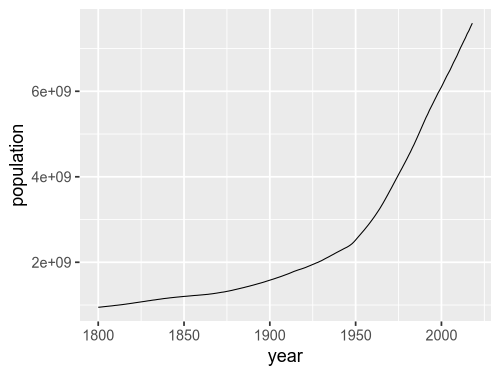

In [17]:
%%R -w 500 -h 375
ggplot(gm, aes(x = year, y = population)) +
       geom_line(stat = 'summary', fun = sum)

I will use the geom approach here.
If you want to use `stat_summary` instead,
you need to set `position = 'stack'`:

```
stat_summary(fun=sum, geom='area', position='stack')
```

This is already the default position for `geom_area`,
so we don't need to set it explicitly.

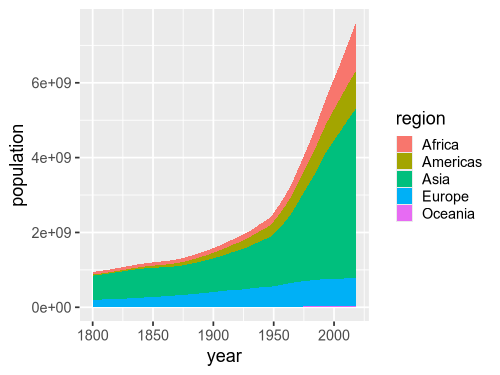

In [18]:
%%R -w 500 -h 375
ggplot(gm, aes(x = year, y = population, fill = region)) +
       geom_area(stat = 'summary', fun = sum)

To change the stacking behavior we can set the position to `dodge`
and add some transparency with the `alpha` parameter.

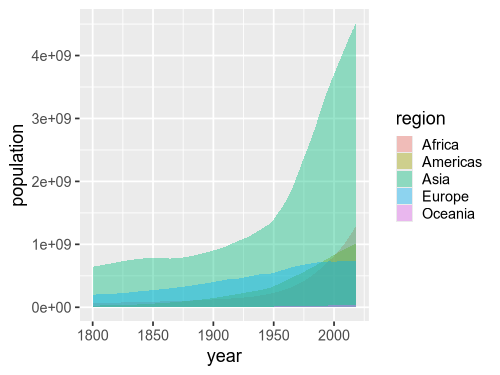

In [19]:
%%R -w 500 -h 375
ggplot(gm, aes(x = year, y = population, fill = region)) +
       geom_area(stat = 'summary', fun = sum, position = 'dodge', alpha = 0.4)

A line plot would be more effective than the layered/dodged area chart above.

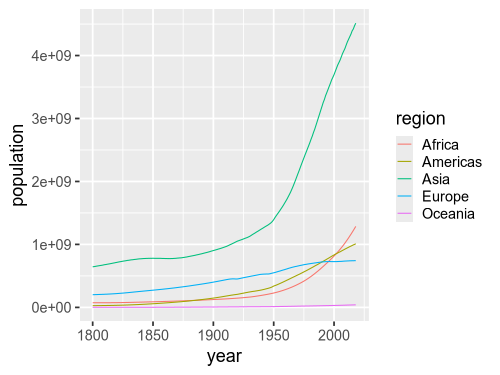

In [20]:
%%R -w 500 -h 375
ggplot(gm, aes(x = year, y = population, color = region)) +
       geom_line(stat = 'summary', fun = sum)

## Bar charts

### Altair

A bar chart is a good choice for representing summary statistics
such as counts of observations and summations
The reason for this is that for such data,
a single summary statistic can well describe it.
For example,
the height of a bar in a bar chart
can clearly communicate the number of people living in a country
at a specific point in time.
There is no missing information here
that we might need to communicate using another mark.

Bar charts are often avoided when visualizing summary statistics
such as the mean and median,
as the purpose of these summary statistics
is to describe a distribution.
However,
the mean and median only describe one aspect of a distribution
(the central tendency, meaning where most values are found).
Thus,
to graphically depict a distribution
we also need to illustrate the spread of the distribution
(the range of the values that were observed).
We will cover how to effectively visualize this later in the course.

Below is an example of this from a [scientific article on how to present data accurately](https://journals.plos.org/plosbiology/article?id=10.1371/journal.pbio.1002128).
The bars in A show the mean and standard error
of all the different set of points in the panels B-E.
This is an example of how bar charts could hide widely different data distributions,
which would lead to different interpretations of the experiment
both visually from looking at the points
and by examining formal statistical comparisons
(the table below the figure,
you don't need to know exactly what these are
just note how different they are from different distributions).

![image.png](img/barplot-hiding-points.png)

To learn how to create bar charts,
we will continue working with the gapminder data set,
but look at values from only a single year, 2018.
First let's create a bar chart of a single value per country,
which represents the sum of all the countries' populations.

In [21]:
gm2018 = gm.query('year == 2018')
gm2018

,country,year,population,region,sub_region,income_group,life_expectancy,income,children_per_woman,child_mortality,pop_density,co2_per_capita,years_in_school_men,years_in_school_women
218,Afghanistan,2018,36400000,Asia,Southern Asia,Low,58.7,1870,4.33,65.90,55.7,NaN,NaN,NaN
437,Albania,2018,2930000,Europe,Southern Europe,Upper middle,78.0,12400,1.71,12.90,107.0,NaN,NaN,NaN
656,Algeria,2018,42000000,Africa,Northern Africa,Upper middle,77.9,13700,2.64,23.10,17.6,NaN,NaN,NaN
875,Angola,2018,30800000,Africa,Sub-Saharan Africa,Lower middle,65.2,5850,5.55,81.60,24.7,NaN,NaN,NaN
1094,Antigua and Barbuda,2018,103000,Americas,Latin America and the Caribbean,High,77.6,21000,2.03,7.89,234.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38105,Venezuela,2018,32400000,Americas,Latin America and the Caribbean,Upper middle,75.9,14200,2.27,15.40,36.7,NaN,NaN,NaN
38324,Vietnam,2018,96500000,Asia,South-eastern Asia,Lower middle,74.9,6550,1.95,20.20,311.0,NaN,NaN,NaN
38543,Yemen,2018,28900000,Asia,Western Asia,Low,67.1,2430,3.79,51.90,54.8,NaN,NaN,NaN
38762,Zambia,2018,17600000,Africa,Sub-Saharan Africa,Lower middle,59.5,3870,4.87,59.50,23.7,NaN,NaN,NaN


:::{note}

Instead of `query`,
we could also use the standard pandas boolean indexing as shown below:

```python
gm2018 = gm[gm['year'] == 2018]
```

To filter for a date range,
we could do the following:

```python
gm[gm['year'].between(1987, 2018)]
```

or 

```python
gm.query("1987 <= year <= 2018")
```

:::

Finally let's create our first bar plot:

In [22]:
alt.Chart(gm2018).mark_bar().encode(
    x='region',
    y='sum(population)'
)

alt.Chart(...)

If we switched x and y,
we would create a horizontal bar chart instead.
Although vertical bar charts are more commonly seen,
horizontal bar charts are preferred
when the labels on the categorical axis
become so long that they need to be rotated
to be readable in a vertical bar chart.
Since this is the case for our plot
we will continue to use horizontal bar charts.

In [23]:
alt.Chart(gm2018).mark_bar().encode(
    x='sum(population)',
    y='region'
)

alt.Chart(...)

To count values,
we can use the statistical function `count()`.
We don't need to specify a column name for the y-axis,
since we are just counting values in each categorical on the x-axis.

In [24]:
alt.Chart(gm2018).mark_bar().encode(
    x='count()',
    y='region'
)

alt.Chart(...)

By default the bars are sorted alphabetically
from top to bottom.
Unless the categorical axis has a natural order to it,
it is best to sort the bars by value.
This makes it easier to see any trends in the data,
and to compare bars of similar height more carefully.

To sort the bars,
we will again use the helper functions `alt.X` and `alt.Y`,
this time with `.sort('x')`
to specify that we want to sort
according to the values on the y-axis.

In [25]:
alt.Chart(gm2018).mark_bar().encode(
    x='count()',
    y=alt.Y('region').sort('x')
)

alt.Chart(...)

When sorting by value,
it is often more visually appealing with the longest bar
the closet to the axis line of the measured value (the x-axis in this case),
as in the chart above (but this is somewhat subjective).
If we prefer the reverse the order,
we could use the minus sign before the axis reference.

In [26]:
alt.Chart(gm2018).mark_bar().encode(
    x='count()',
    y=alt.Y('region').sort('-x')
)

alt.Chart(...)

Sometimes there is a natural order to our data
that we want to use for the bars,
for example days of the week.
Althogh our sort order in the plot above
is the best for this particular data,
let's demonstrate how we can change it.

In [27]:
my_order = ['Africa', 'Europe', 'Oceania', 'Asia', 'Americas']
alt.Chart(gm2018).mark_bar().encode(
    x='count()',
    y=alt.Y('region').sort(my_order)
)

alt.Chart(...)

For situations like this,
we can pass a list or array
to the `sort` parameter.
We can either create this list manually as in this slide,
or use the pandas sort function if we wanted
for example reverse alphabetical order.

To learn more about good considerations
when plotting counts of categorical observations,
you can refer to [chapter 6 of Fundamental of Data Visualizations](https://clauswilke.com/dataviz/visualizing-amounts.html).

### ggplot

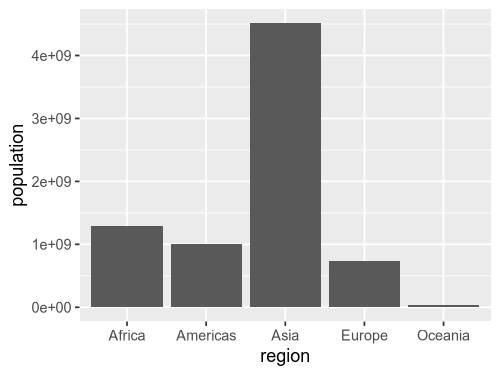

In [28]:
%%R -w 500 -h 375
gm2018 <- gm %>% filter(year == 2018)

ggplot(gm2018, aes(x = region, y = population)) +
    geom_bar(stat = 'summary', fun = sum)

Flip x and why for a horizontal chart.

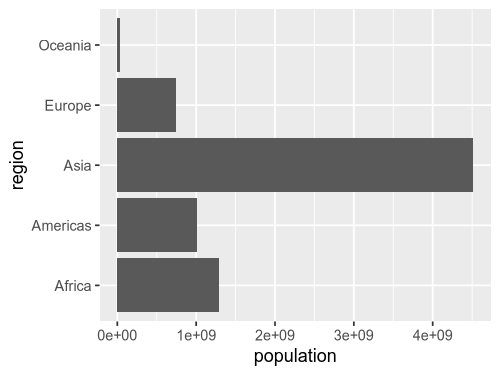

In [29]:
%%R -w 500 -h 375
ggplot(gm2018, aes(y = region, x = population)) +
    geom_bar(stat = 'summary', fun = sum)

Remove `x` when counting
and use the `'count'` stat instead of `'summary'`.
Since there is only one way of counting
we don't need to specify a function
(there are many ways of summarizing: mean, median, sum, sd, etc).

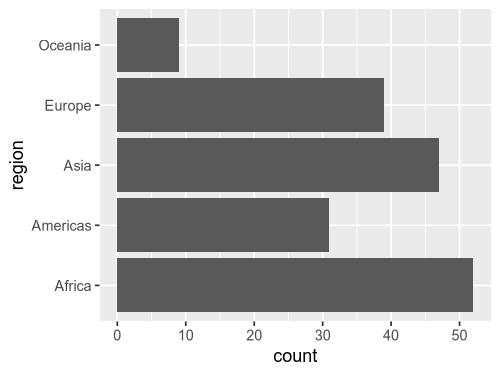

In [30]:
%%R -w 500 -h 375
ggplot(gm2018, aes(y = region)) +
    geom_bar(stat = 'count')

ggplot discourages people from using bars for summaries,
so the default `stat` is actually `'count'`,
which means we can leave it blank.

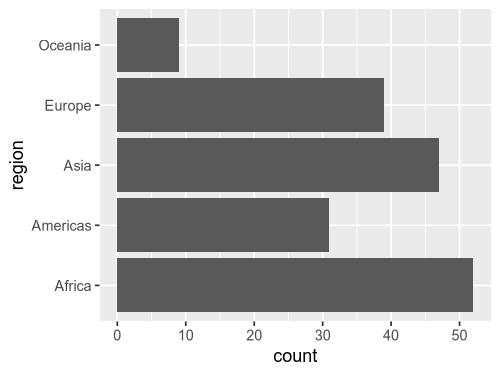

In [31]:
%%R -w 500 -h 375
ggplot(gm2018, aes(y = region)) +
    geom_bar()

It is easy to reorder a column based on another existing column in ggplot,
but it is a little bit tricky to do it based on a non-existing column,
such as the count so we need to create a column for the count first.

`add_count` creates a column named `n`,
that we can then pass to the base R `reorder` function
as the sorting key for our x-axis column:

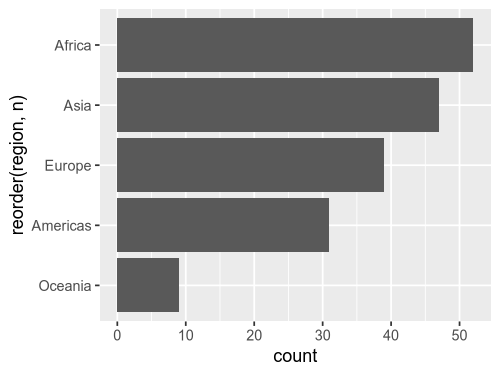

In [32]:
%%R -w 500 -h 375
gm2018 %>%
    add_count(region) %>%
       ggplot(aes(y = reorder(region, n))) +
       geom_bar()

Reversing a sort is done wih the minus sign like in Altair.

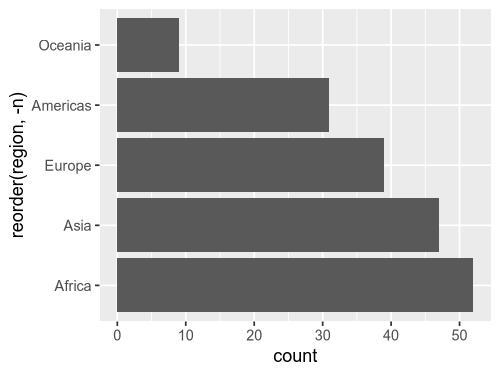

In [33]:
%%R -w 500 -h 375
gm2018 %>%
    add_count(region) %>%
       ggplot(aes(y = reorder(region, -n))) +
        geom_bar()

## Histograms

### Altair

So far we have been counting observations in categorical groups
(the continents).
To make a bar chart of counts for a quantitative/numerical value
does not look that great by default.

In [34]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy'),
    y='count()'
)

alt.Chart(...)

This is because a bar is plotted for each of the unique numerical values,
and our histogram would look very spiky as you can see in this slide.
This is because there are very few values that are exactly the same.

For example,
values like 67.2, 69.3, 69.5, etc,
would all get their own bar
instead of being in the same bar
representing the interval 65-70.
We can see this by using the handy interactive `tooltip`
encoding in Altair
while hovering over the bars

In [35]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy'),
    y='count()',
    tooltip='life_expectancy'
)

alt.Chart(...)

To fix this issue,
we can create bins on the x-axis and count all those values together.
This way we can see how many observations
fall into numerical intervals on the x-axis
in an attempt to estimate the distribution, or shape, of the entire dataset.
This type of chart is so common that it has its own name: histogram.

The first step we need to perform in Altair,
is to divide the axis into intervals,
which is called binning.
To enable binning of the x-axis in Altair,
we can set `bin=True` inside `alt.X`.
This automatically calculates a suitable number of bins,
and counts up all the values within each group
before plotting a bar representing this count.

In [36]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy').bin(),
    y='count()'
)

alt.Chart(...)

In contrast to bar charts,
it is rarely beneficial to make horizontal histograms
since the labels are numbers which don't need to be rotated to be readable.

We could bin the tooltip the same way.
Altair is very consistent,
so when you learn the building blocks,
you can use them in many places.

In [37]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy').bin(),
    y='count()',
    tooltip=alt.Tooltip('life_expectancy').bin()
)

alt.Chart(...)

Although the automatically calculated number of bins is often appropriate,
it tends to be on the low side.
While to many bins make the plot look spiky,
having too few bins can hide the true shape of the data distribution.
We can change the number of bins by passing `alt.Bin(maxbins=30)`
to the `bin` parameter instead of passing the value `True`.

In [38]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy').bin(maxbins=30),
    y='count()'
)

alt.Chart(...)

What is a good rule for how many bins there should be?
A guideline is that you want a histogram to accurately capture the underlying distribution
without introducing artifacts:

- Too wide bins can hide detail in the distribution,
  e.g. bimodality might not show up since a single bin covers both peaks.
- Too narrow narrow bins can suggest additional detail
  that is an artifact of the limited size of the sample
  and/or the exact arrangement of the bins.
  This often shows up as the histogram appearing to have multiple small spikes
  (note that there are case where multiple small spikes could indicate a true property of the distribution,
  e.g. a periodicity so it is important to think about this in the context of the specific dataset you are working with).

You also want to avoid unequal bin sizes,
since it would not be fair to compare the height of these,
and ideally have the bins line up nicely with the x-axis so that the interval the cover is easily identifiable.
In practice,
it is a good idea to experiment with a few different bin size to better understand the distribution of your data
and how to accurately present it.

Both Altair and ggplot uses an automatic rule to compute a suggested optimal number of bin,
which is usually quite good.
Altair then also snaps the bins to the same width as the x-axis ticks,
so that it is easy to read which interval they cover.
This snapping sometimes creates to wide bins
so you might need to increase the `maxbins` in Altair.
In ggplot,
you might occasionally want to create fewer bins than the default.

[This page has additional detail about bins widths
and examples of how histograms with too many and too few bins can look like](https://answerminer.com/blog/binning-guide-ideal-histogram).

### ggplot

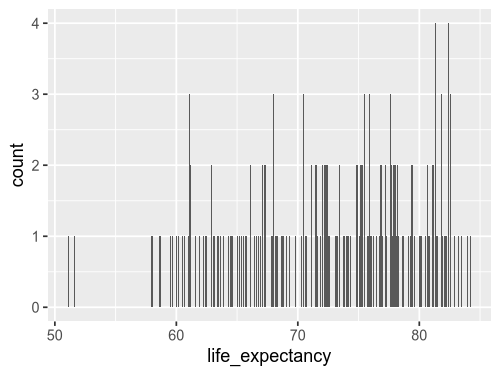

In [56]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_bar()

We can change the `stat` from the default `'count'`
to `'bin``.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


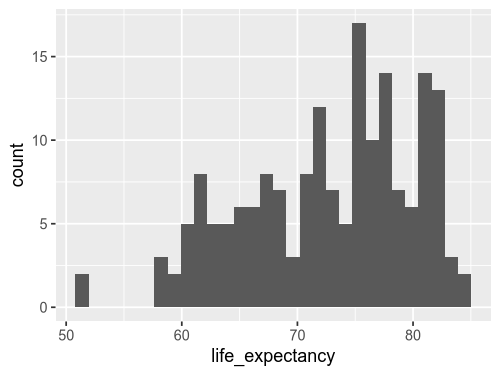

In [40]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_bar(stat = 'bin')

Since this is so common,
there is a shortcut: `geom_histogram`.
This geom calls `geom_bar(stat = 'bin')` by default,
so the output will be exactly the same.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


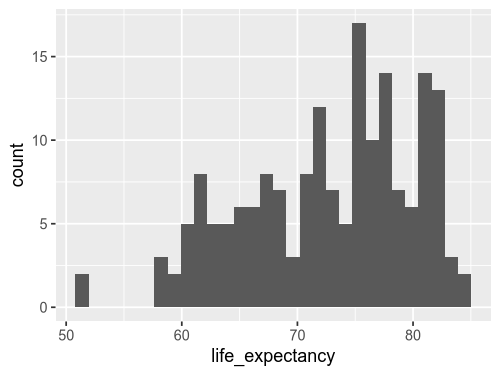

In [41]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_histogram()

Using `geom_histogram` is a bit more common,
so that is what I will use in the lecture notes,
but please remember that there is nothing magical with this function.
It is just `geom_bar` with a different default argument to `stat`.

Instead of setting binwidth as suggested,
we can use `bins` to set the number of bins,
which is more similar to `maxbins` in Altair.

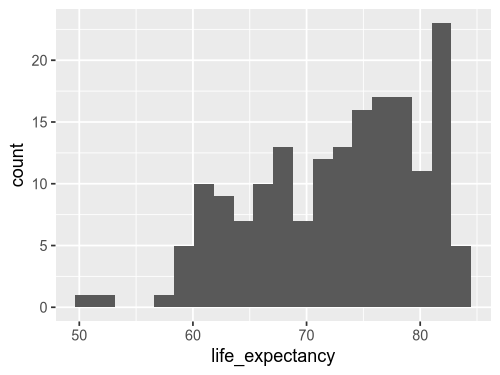

In [42]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_histogram(bins = 20)

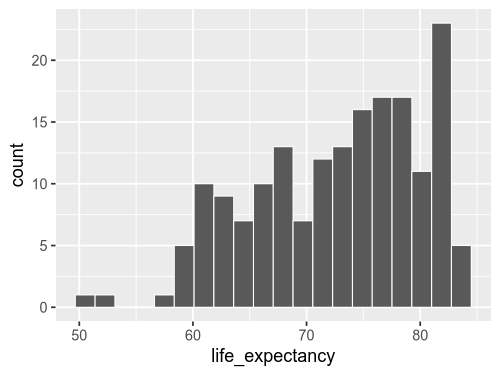

In [43]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy)) +
    geom_histogram(bins = 20, color = 'white')

## Facetting into subplots

### Altair

Now we will be learning how we can use facets, or subplots,
to compare different groups in the data.

We have seen how to use color to divide data into groups.
using the name of another variable we could use the `color` channel.
However,
in the case of hisotgrams this becomes messy
since it is hard to compare bars that are on different baselines
and we don't get a good sense of what the distributions 
of the continents look like here.

In [44]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy').bin(maxbins=30),
    y='count()',
    color='region'
)

alt.Chart(...)

Altair creates a stacked bar chart by default
when we when encode a dataframe column as the `color` channel.
Notice we are now using the helper functions we saw before but now with `alt.Color`.
(This must be spelt without the "U")
Just like with the stacked area chart,
this is good when the total height of each bar
is the most important,
but it is not ideal when the main focus of our visualization
is to compare the coloured groups against each other.

The reason it is difficult to compare
the length of the coloured segments against each other
(both within a bar and between bars),
is that they don't share the same baseline
so we can't just compare the position of the top part of the bars,
but have to try to estimate their lengths.

For these reasons,
it is difficult to tell the difference between the regions
in this plot
and it is not an effective visualization.

If there are just a few groups (~1-3)
it can be sufficient to not to stack the bar along the y-axis,
and instead layer them behind each other with some opacity
so that we are able to see all groups.

In [45]:
alt.Chart(gm2018).mark_bar(opacity=0.7).encode(
    x=alt.X('life_expectancy').bin(maxbins=30),
    y=alt.Y('count()').stack(False),
    color='region'
)

alt.Chart(...)

Although the bars share the same baseline here,
they are still difficult to compare against each other,
because there is so much overlap with different colours.

Layered histograms and bar charts can be effective
when there are few groups and clear separation between them,
but that is not the case here
and this plot is even harder to interpret than the previous one.
Instead,
we can use facetting to compare these groups.

Faceting creates one facet/subplot
for each group in the specified dataframe column.
To ensure that the entire grid of facets fit on the slide,
we're also shrinking the dimensions of each subplot.

In [46]:
alt.Chart(gm2018).mark_bar().encode(
    x=alt.X('life_expectancy').bin(maxbins=30),
    y='count()',
    color='region'
).facet(
    'region'
)

alt.FacetChart(...)

From this chart,
we can more easily compare the regions.
For example,
we can see that that most European countries
have a higher life expectancy
than most African countries.

However,
it is a little bit more demanding 
to see exactly how much of the two distributions are overlapping
and we would need to look at the number of the axes
while scanning left and right on the grid.

To make it easier to compare overlap between histograms on the x-axis,
we can lay out the facets vertically in a single column.

The vertical layout is preferred in this case since
we are the most interested to compare position on the x-axis between the groups.
If we instead wanted to compare position on the y-axis,
a single row would have been better.

In [47]:
alt.Chart(gm2018).mark_bar().encode(
    alt.X('life_expectancy').bin(maxbins=30),
    alt.Y('count()').title(None),
    alt.Color('region')
).properties(
    height=100
).facet(
    'region',
    columns=1
)

alt.FacetChart(...)

Here,
we immediately see that there is a long region of
overlap between European and African countries,
but that the bulk of each distribution is separated.

Compare this with the stacked and layered histogram
we made in the first few slides
and you will realize just how much easier it is 
to compare the groups here!

If we are interested in comparing both x and y values between plots,
or are presenting the visualization in a context
where we do not have the room
to create a single column or row for all the plots,
a good alternative
is to create an even (or near even) grid of facets,
as in this slide.

In [48]:
alt.Chart(gm2018).mark_bar().encode(
    alt.X('life_expectancy').bin(maxbins=30),
    alt.Y('count()').title(None),
    alt.Color('region')
).properties(
    height=100,
    width=200
).facet(
    'region',
    columns=2
)

alt.FacetChart(...)

As you can see,
the default behaviour for Altair is to leave the last position empty,
but include the x-axis line
so that we can use it to read the plot in the top row.

You might also discover that you can specify `facet`, `row`, and `column`
as encodings instead of via the `.facet` method.
This is fine for simpler charts but can lead to difficulties 
with complex compound charts,
which is why we are not focusing on them here
([more details in the docs if you are interested](https://altair-viz.github.io/user_guide/compound_charts.html?highlight=facet#faceted-charts)).

### ggplot

When coloring bars and areas in ggplot,
we need to use `fill` instead of `color`.

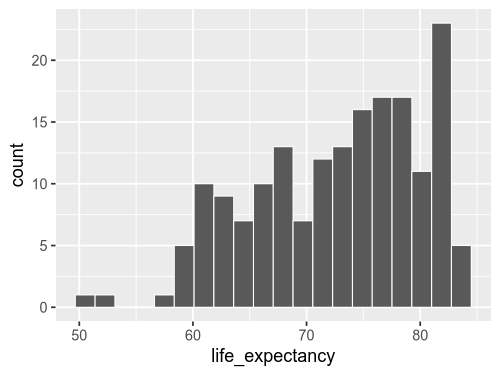

In [49]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy, color = region)) +
    geom_histogram(bins = 20, color = 'white')

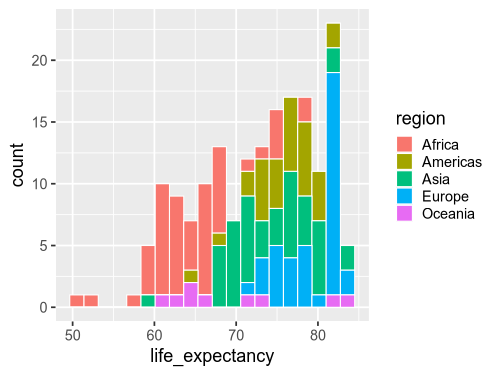

In [50]:
%%R -w 500 -h 375
ggplot(gm2018, aes(x = life_expectancy, fill = region)) +
    geom_histogram(bins = 20, color = 'white')

Facetting works via `facet_wrap`. 
By default it tries to create an even num of cols and rows,
rather than putting all plot in one row like Altair.

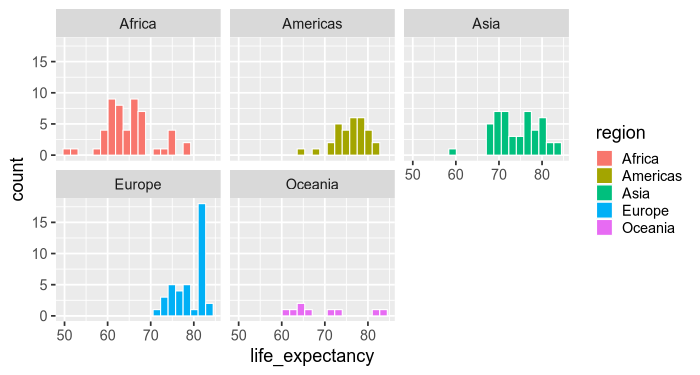

In [51]:
%%R -w 700 -h 375
ggplot(gm2018, aes(x = life_expectancy, fill = region)) +
    geom_histogram(bins = 20, color = 'white') +
    facet_wrap(~region)

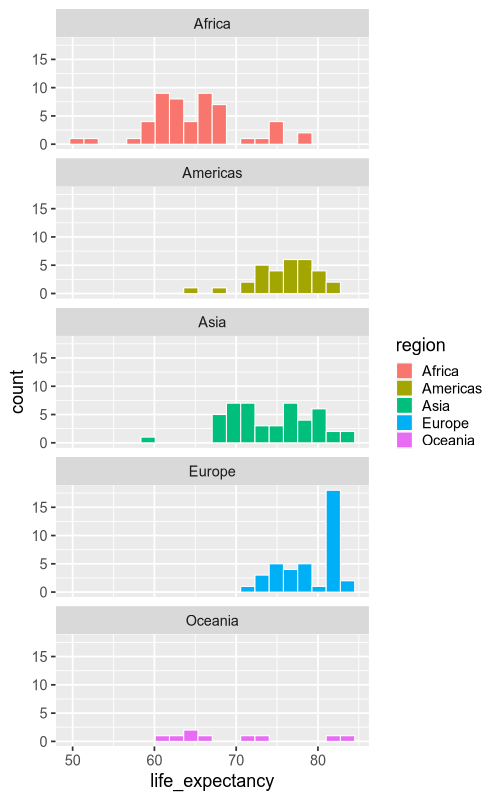

In [52]:
%%R -w 500 -h 800
ggplot(gm2018, aes(x = life_expectancy, fill = region)) +
    geom_histogram(bins = 20, color = 'white') +
    facet_wrap(~region, ncol = 1)

## Plot configuration

### Altair

These two plots are included as a resource
to show how you can change the appearance of a plot,
including titles and sizes of plot elements.
We will later cover what are the best practices in these areas,
but for now it is enough to know the mechanics of how you can change these.
Feel free to explore and create visualizations that appeal to you!

In [53]:
alt.Chart(gm2018, title='My plot title').mark_point().encode(         # Change the title of the plot
    alt.X('child_mortality').title('Child mortality'),                # Change the x-axis title
    alt.Y('life_expectancy').scale(zero=False),                       # Change the y-axis scale to not include zero
    alt.Size('population').scale(range=(100, 1000)),                  # Change the range (min, max) of the size scale to enlarge points
    alt.Tooltip('country')                                            # Add country name on hover
).configure_axis(
    labelFontSize=14,                                                 # Change the font size of the axis labels (the numbers)
    titleFontSize=20                                                  # Change the font size of the axis title
).configure_legend(
    titleFontSize=14                                                  # Change the font size of the legend title
).configure_title(
    fontSize=30                                                       # Change the font size of the chart title
)

alt.Chart(...)

### ggplot

With ggplot,
the functions have slightly different names 
and are all added to the end of the plotting construct
rather than to the different axes functions directly.

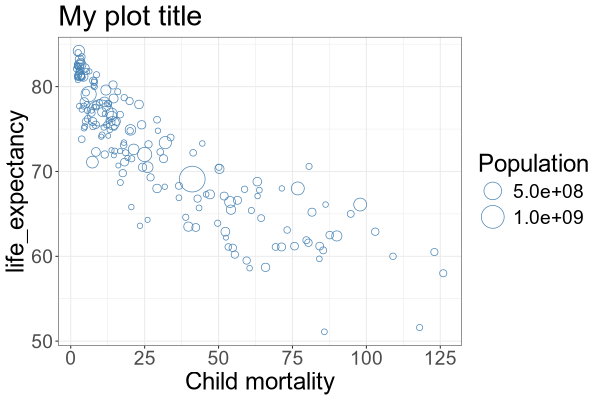

In [54]:
%%R -w 600 -h 400

ggplot(gm2018, aes(x = child_mortality, y = life_expectancy, size = population)) +
    geom_point(shape = 1, color = 'steelblue') +      # Change to hollow blue circles
    scale_size(range = c(2, 12)) +                    # Change the range of the size scale to enlarge points
    ggtitle('My plot title') +                        # Change the title of the plot
    labs(x = 'Child mortality') +                     # Change the x-axis scale to log and the title to 'POP'
    labs(size = 'Population') +                       # Change legend title
    theme_bw() +                                      # Change the theme to black and white, ther is also theme_classic()
    theme(text =  element_text(size = 24))            # Change the text size of all labels